In [222]:
import CellModeller.CellState
import pickle
import numpy as np
import matplotlib.pyplot as plt
from random import random
import os

In [214]:
fname = '/Users/timrudge/cellmodeller/data/ex5_colonySector-20-04-21-14-10/step-00740.pickle'
data = pickle.load(open(fname, 'rb'))

In [215]:
cs = data['cellStates']
lineage = data['lineage']
len(cs)

4572

In [59]:
counts = {}
counts_random = {}
N = [0,0]
for id1,cell1 in cs.items():
    p1 = cell1.pos
    parent1 = lineage[cell1.id]
    for id2,cell2 in cs.items():
        type1 = 1 * (cell1.n_a > cell1.n_b)
        type2 = 1 * (cell2.n_a > cell2.n_b)
        N[type1] += 1
        N[type2] += 1
        p2 = cell2.pos
        parent2 = lineage[cell2.id]
        d = np.sqrt( (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 )
        idx = int(d//5)
        if type1!=type2:
            if idx in counts:
                counts[idx] += 1
            else:
                counts[idx] = 1
        if random()<0.5:
            if idx in counts_random:
                counts_random[idx] += 1
            else:
                counts_random[idx] = 1

dict_keys([2, 1, 3, 0, 5, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
dict_keys([0, 3, 2, 1, 5, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])


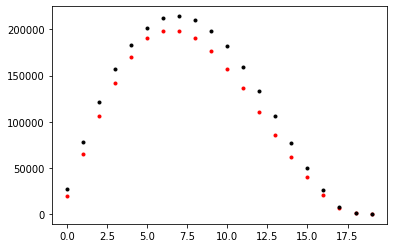

In [55]:
plt.plot(list(counts.keys()), list(counts.values()), 'r.')
print(counts.keys())

plt.plot(list(counts_random.keys()), list(counts_random.values()), 'k.')
print(counts_random.keys())

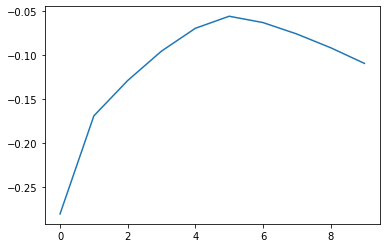

In [58]:
ratio = []
for i in range(10):
    ratio.append(counts[i]/counts_random[i] -1)
plt.plot(ratio)

In [219]:
def relatedness(id1, id2, lineage):
    p1 = id1
    p2 = id2
    path2 = 0
    steps = 0
    
    # Find common ancestor
    while p1!=p2 and p1!=1 and p2!=1:
        p1 = lineage.get(p1, 1)
        p2 = lineage.get(p2, 1)
    if p1==p2:
        ancestor = p1
    else:
        ancestor = 1
        
    # Find path length from cell1 to ancestor
    path1 = 0
    p1 = id1
    while p1!=ancestor:
        p1 = lineage.get(p1,1)
        path1 += 1
        
    # Find path length from cell2 to ancestor
    path2 = 0
    p2 = id2
    while p2!=ancestor:
        p2 = lineage.get(p2,1)
        path2 += 1
        
    rel = 2**(-path1-path2)
    return rel

In [220]:
relatedness(10, 3, lineage)

0.0625

In [224]:
dirs = [
    'ex5_colonySector-20-04-21-14-10',
    'ex5_colonySector-20-04-21-14-14',
    'ex5_colonySector-20-04-21-14-16',
    'ex5_colonySector-20-04-21-14-16_2',
    'ex5_colonySector-20-04-21-14-22',
    'ex5_colonySector-20-04-21-14-22_2'
]

counts = {}
sum_rel = {}

for d in dirs:
    fname = os.path.join('/Users/timrudge/cellmodeller/data', d, 'step-00740.pickle')
    data = pickle.load(open(fname, 'rb'))
    cs = data['cellStates']
    lineage = data['lineage']
    for id1,cell1 in cs.items():
        p1 = cell1.pos
        for id2,cell2 in cs.items():
            if id1!=id2:
                p2 = cell2.pos
                d = np.sqrt( (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 )
                idx = int(d//5)
                if idx in counts:
                    counts[idx] += 1
                else:
                    counts[idx] = 1
                rel = relatedness(id1, id2, lineage)
                if idx in sum_rel:
                    sum_rel[idx] += rel
                else:
                    sum_rel[idx] = rel


In [225]:
counts_r = np.array(list(counts.keys())) * 5.
sum_rel_r = np.array(list(sum_rel.keys())) * 5.

counts = np.array(list(counts.values()))
sum_rel = np.array(list(sum_rel.values()))

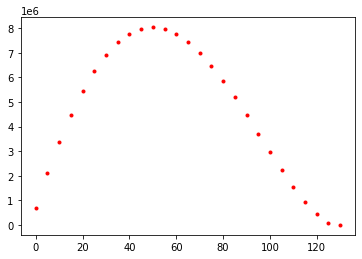

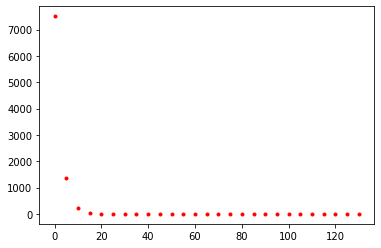

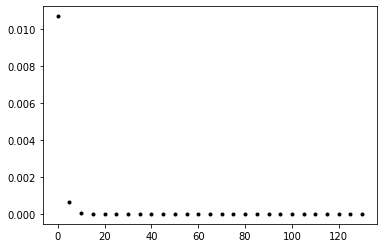

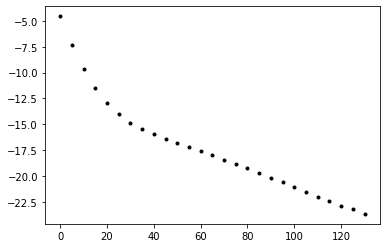

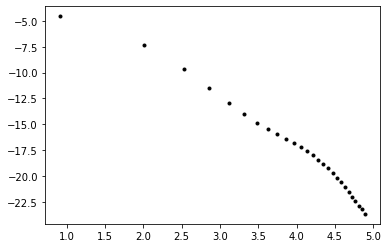

In [255]:
plt.plot(counts_r, counts, 'r.')
plt.figure()
plt.plot(sum_rel_r, sum_rel, 'r.')
plt.figure()
plt.plot(sum_rel_r, sum_rel/counts, 'k.')
plt.figure()
plt.plot(sum_rel_r, np.log(sum_rel/counts), 'k.')
plt.figure()
plt.plot(np.log(sum_rel_r+2.5), np.log(sum_rel/counts), 'k.')

[-5.00703934  2.35045402]


<ipython-input-256-7ca3180283f5>:7: RuntimeWarning: divide by zero encountered in log
  plt.plot(sum_rel_r, np.log(sum_rel_r)*z[0] + z[1], 'r.')
<ipython-input-256-7ca3180283f5>:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(sum_rel_r+2.5), np.log(sum_rel_r)*z[0] + z[1], 'r.')


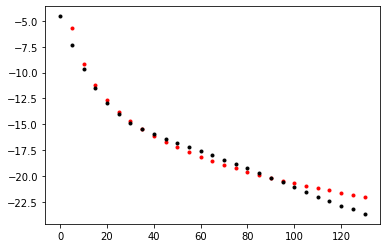

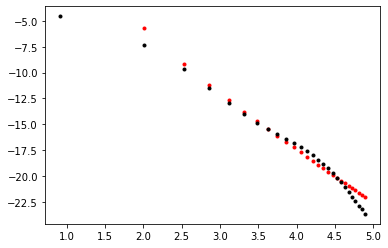

In [256]:
x = np.log(sum_rel_r+2.5)
y = np.log(sum_rel/counts)

z = np.polyfit(x, y, deg=1)
print(z)

plt.plot(sum_rel_r, np.log(sum_rel_r)*z[0] + z[1], 'r.')
plt.plot(sum_rel_r, np.log(sum_rel/counts), 'k.')

plt.figure()
plt.plot(np.log(sum_rel_r+2.5), np.log(sum_rel_r)*z[0] + z[1], 'r.')
plt.plot(np.log(sum_rel_r+2.5), np.log(sum_rel/counts), 'k.')

In [174]:
np.any(~np.isfinite(sum_rel/counts))

False

In [245]:
# Compute Moran's I
dirs = [
    'ex5_colonySector-20-04-21-14-10',
    #'ex5_colonySector-20-04-21-14-14',
    #'ex5_colonySector-20-04-21-14-16',
    #'ex5_colonySector-20-04-21-14-16_2',
    #'ex5_colonySector-20-04-21-14-22',
    #'ex5_colonySector-20-04-21-14-22_2'
]

Is = []
for d in dirs:
    fname = os.path.join('/Users/timrudge/cellmodeller/data', d, 'step-00340.pickle')
    data = pickle.load(open(fname, 'rb'))
    cs = data['cellStates']

    # Compute mean x where x=n_a number of plasmid type a
    n_a = [cell.n_a for id,cell in cs.items()]
    x_mean = np.mean(n_a)

    # Compute numerator and denominator of Moran's I
    sum_dev_x1 = 0
    sum_codev = 0
    W = 0
    for id1,cell1 in cs.items():
        p1 = cell1.pos
        x1 = cell1.n_a
        sum_dev_x1 += (x1-x_mean)**2
        for id2,cell2 in cs.items():
            if id1!=id2:
                p2 = cell2.pos
                x2 = cell2.n_a
                d = np.sqrt( (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 )
                w12 = 1/d/d
                W += w12
                sum_codev += w12 * (x1-x_mean) * (x2-x_mean)
    N = len(cs)
    I = N/W * sum_codev / sum_dev_x1
    Is.append(I)

In [246]:
print(x_mean)
print(np.sqrt(sum_dev_x1/N))
print(Is)

9.812925170068027
4.679057002920282
[0.22217297039615966]
